In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
nehu = pd.read_csv('/content/gdrive/MyDrive/data/irent_1st_project/export_neihu.csv')

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns',None) # 顯示全部行資料
nehu.head().sort_values(by='TIME_SNO')

,TIME_SNO,SNO,La,Lo,date,year,month,day,time_range,weekday,ISHoliday,cityName,townname,temp,wet,windspeed,rain,in,out,stay,need,OI_diff,remain,LAST_IN,LAST_OUT,LAST_STAY,LAST_OI_DIFF,LAST_remain,avg4w_in,avg4w_Out,avg4w_stay,avg4w_OI_diff,avg4w_remain
0,5,12029,25.055,121.576,2022-01-03,2022,1,3,2,1,0,臺北市,內湖區,18.730435,81.147449,2.008471,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.0000,0.200000,0.000000,0.200000
3,6,12029,25.055,121.576,2022-01-10,2022,1,10,6,1,0,臺北市,內湖區,18.412500,86.463661,1.921591,0.615385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037037,0.0000,0.111111,-0.037037,0.185185
2,7,12029,25.055,121.576,2022-01-17,2022,1,17,4,1,0,臺北市,內湖區,17.587500,91.863337,2.041889,7.807692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031250,0.0625,0.000000,0.031250,0.031250
1,10,12029,25.055,121.576,2022-02-07,2022,2,7,3,1,0,臺北市,內湖區,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.000000
4,11,12029,25.055,121.576,2022-02-15,2022,2,15,1,2,0,臺北市,內湖區,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.000000


In [ ]:
# TIME_SNO 序號、SNO 序號、La 經度、Lo 緯度、date 日期、year 年份、month 月份、day 幾號、time_range 時段、weekday 星期幾
# ISHoliday 是否假日(0非1是)、cityName 城市、townname 鄉鎮、temp 溫度、wet 溼度、windspeed 風速、rain 雨量
# in 這個時段進入的數量
# out 這個時段出去的數量
# stay 這個時段未動的數量(意即此時段開始和結束都在的車，且都未移動)
# need inout相加？
# OI_diff inout相減？
# remain ？
# LAST_IN 前一天的同時段in
# LAST_OUT 前一天的同時段out
# LAST_STAY 前一天的同時段stay
# LAST_OI_DIFF ?
# LAST_remain ?
# avg4w_in 4周平均的同時段in
# avg4w_Out 4周平均的同時段out
# avg4w_stay 4周平均的同時段stay
# avg4w_OI_diff ?
# avg4w_remain ?

In [ ]:
print(nehu.value_counts('ISHoliday').sort_index())
print(nehu.value_counts('year').sort_index())
print(nehu.value_counts('month').sort_index())
print(nehu['month'].unique())

ISHoliday
0    223200
1    125550
dtype: int64
year
2021    111600
2022    237150
dtype: int64
month
1     144150
2      93000
12    111600
dtype: int64
[ 1  2 12]


In [ ]:
nehu.groupby(['month']).get_group(1)

,TIME_SNO,SNO,La,Lo,date,year,month,day,time_range,weekday,ISHoliday,cityName,townname,temp,wet,windspeed,rain,in,out,stay,need,OI_diff,remain,LAST_IN,LAST_OUT,LAST_STAY,LAST_OI_DIFF,LAST_remain,avg4w_in,avg4w_Out,avg4w_stay,avg4w_OI_diff,avg4w_remain
0,5,12029,25.055,121.576,2022-01-03,2022,1,3,2,1,0,臺北市,內湖區,18.730435,81.147449,2.008471,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.000000,0.200000,0.000000,0.200000
2,7,12029,25.055,121.576,2022-01-17,2022,1,17,4,1,0,臺北市,內湖區,17.587500,91.863337,2.041889,7.807692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031250,0.062500,0.000000,0.031250,0.031250
3,6,12029,25.055,121.576,2022-01-10,2022,1,10,6,1,0,臺北市,內湖區,18.412500,86.463661,1.921591,0.615385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037037,0.000000,0.111111,-0.037037,0.185185
5,8,12029,25.055,121.576,2022-01-25,2022,1,25,2,2,0,臺北市,內湖區,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
11,7,12029,25.055,121.576,2022-01-12,2022,1,12,2,3,0,臺北市,內湖區,13.479167,83.089274,1.789777,0.863636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.083333,0.138889,0.083333,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348744,6,17259,25.111,121.586,2022-01-11,2022,1,11,5,2,0,臺北市,內湖區,14.070833,80.306804,2.586218,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
348745,8,17259,25.111,121.586,2022-01-25,2022,1,25,6,2,0,臺北市,內湖區,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
348747,7,17259,25.111,121.586,2022-01-14,2022,1,14,1,5,0,臺北市,內湖區,15.461538,69.703382,2.136187,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.027778,0.000000,0.027778,-0.027778
348748,9,17259,25.111,121.586,2022-01-28,2022,1,28,5,5,0,臺北市,內湖區,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
nehu = nehu.drop(['TIME_SNO'],axis=1)
nehu = nehu.drop(['SNO'],axis=1)

In [ ]:
# Pearson相關係數測量表徵之間的線性關係。係數的值在-1和+1之間變化，其中0表示它們之間沒有相關性。 接近-1或+1的相關性意味著極強的線性關係
nehu_test = nehu[['time_range','weekday','ISHoliday','temp','wet','windspeed','rain','in','out','stay','need','OI_diff','remain',
      'LAST_IN','LAST_OUT','LAST_STAY','LAST_OI_DIFF','LAST_remain','avg4w_in','avg4w_Out','avg4w_stay','avg4w_OI_diff','avg4w_remain']]
nehu_test.corr(method ='pearson') 

,time_range,weekday,ISHoliday,temp,wet,windspeed,rain,in,out,stay,need,OI_diff,remain,LAST_IN,LAST_OUT,LAST_STAY,LAST_OI_DIFF,LAST_remain,avg4w_in,avg4w_Out,avg4w_stay,avg4w_OI_diff,avg4w_remain
time_range,1.000000e+00,4.069723e-17,-3.985138e-17,-7.797358e-17,-1.581246e-16,9.498204e-18,-1.773354e-17,0.012932,0.020188,0.001197,0.000715,0.009407,0.004817,0.013505,0.021518,0.001373,0.010312,0.005112,0.024736,0.037424,0.001188,0.021301,0.007761
weekday,4.069723e-17,1.000000e+00,6.614616e-01,-2.602626e-02,-1.354866e-01,8.445545e-03,1.604984e-01,-0.014221,-0.014384,-0.016166,0.015850,0.000445,-0.017143,-0.013086,-0.013974,-0.016078,-0.000580,-0.016768,-0.029036,-0.028323,-0.031770,0.002519,-0.033408
ISHoliday,-3.985138e-17,6.614616e-01,1.000000e+00,-1.224303e-01,-1.293314e-01,-6.154787e-03,-4.019878e-02,-0.017762,-0.019372,-0.024862,0.023961,-0.001386,-0.025388,-0.019715,-0.021009,-0.027347,-0.000813,-0.027913,-0.029742,-0.030400,-0.032787,0.000133,-0.034385
temp,-7.797358e-17,-2.602626e-02,-1.224303e-01,1.000000e+00,7.500305e-02,-2.773141e-01,1.350076e-02,-0.008668,-0.008600,-0.007923,0.007835,0.000464,-0.008947,-0.022257,-0.020464,-0.023861,0.003523,-0.026229,0.001551,0.001826,0.002220,0.000450,0.002231
wet,-1.581246e-16,-1.354866e-01,-1.293314e-01,7.500305e-02,1.000000e+00,-3.056273e-01,4.093305e-01,-0.003598,-0.003757,-0.002444,0.002376,-0.000073,-0.002730,0.001734,0.001048,0.003585,-0.001045,0.003469,0.003135,0.002531,0.002748,-0.001262,0.003147
windspeed,9.498204e-18,8.445545e-03,-6.154787e-03,-2.773141e-01,-3.056273e-01,1.000000e+00,1.306905e-01,-0.007593,-0.007733,-0.001449,0.001440,0.000122,-0.003217,0.006076,0.006028,-0.000051,-0.000338,0.001386,0.002303,0.002293,0.001209,-0.000113,0.001505
rain,-1.773354e-17,1.604984e-01,-4.019878e-02,1.350076e-02,4.093305e-01,1.306905e-01,1.000000e+00,-0.014000,-0.013400,-0.010812,0.010845,0.001443,-0.012785,-0.001577,-0.001069,0.000759,0.000787,0.000185,-0.007015,-0.006845,-0.007077,0.000607,-0.007654
in,1.293247e-02,-1.422138e-02,-1.776208e-02,-8.668174e-03,-3.598171e-03,-7.592606e-03,-1.399988e-02,1.000000,0.746847,0.487355,-0.554504,-0.396578,0.669753,0.183044,0.170861,0.133820,-0.025570,0.158766,0.518244,0.437679,0.308879,-0.164600,0.386428
out,2.018835e-02,-1.438431e-02,-1.937243e-02,-8.599854e-03,-3.756967e-03,-7.732594e-03,-1.340043e-02,0.746847,1.000000,0.486477,-0.411401,0.314283,0.582293,0.171560,0.185808,0.138071,0.011170,0.161907,0.439690,0.523510,0.309051,0.128702,0.363187
stay,1.197255e-03,-1.616626e-02,-2.486155e-02,-7.923098e-03,-2.444176e-03,-1.448788e-03,-1.081203e-02,0.487355,0.486477,1.000000,-0.979786,-0.024172,0.962497,0.130616,0.129065,0.246153,-0.008468,0.240381,0.305130,0.305159,0.537543,-0.013212,0.520814


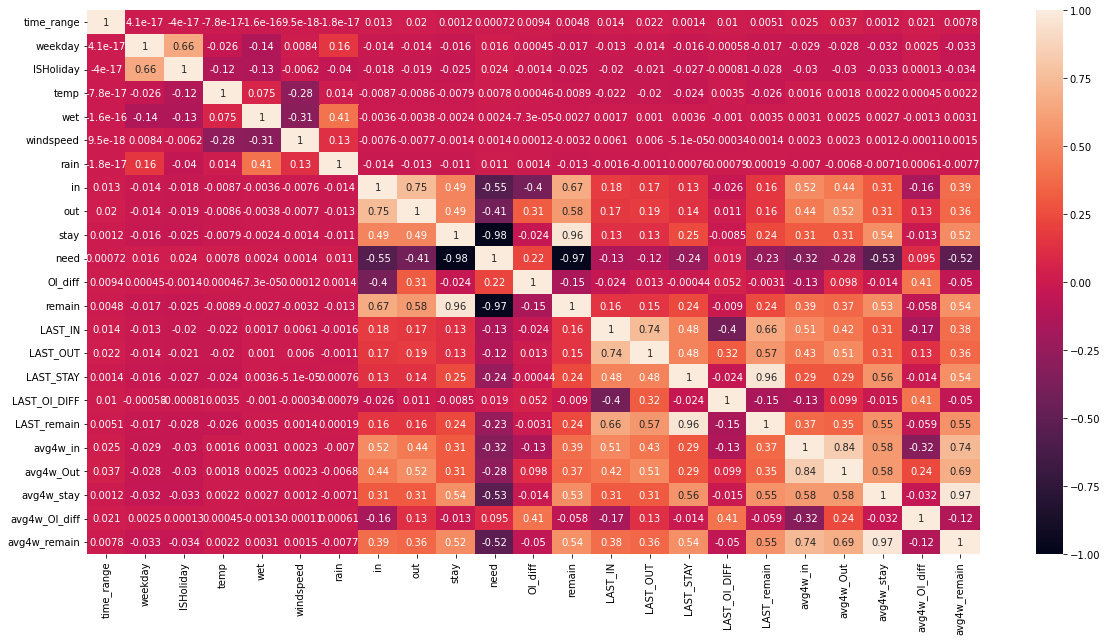

In [ ]:
# EDA - 使用熱度圖視覺化皮爾遜積差相關係數
import matplotlib as plt
import seaborn as sns
plt.pyplot.figure(figsize=(20,10))
sns.heatmap(nehu_test.corr(method ='pearson')
            ,annot=True # annot:如果为True，则将数据值写入每个单元格中
            ,vmax=1 # vmin,vmax:显示的数据值的最大和最小的范围
            ,vmin=-1)
            #,cmap=plt.cm.Reds 改變圖的顏色呈獻而已
plt.pyplot.show()

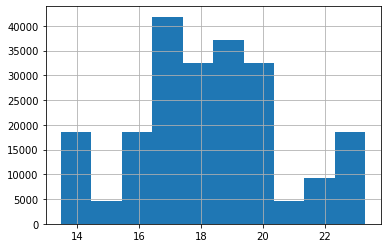

In [ ]:
nehu['temp'].hist() # hist直方圖是數據分佈的表示，代表某數值出現多少次

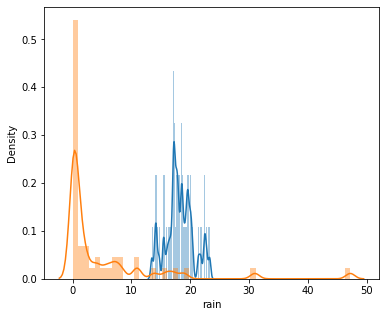

In [ ]:
# 這個資料的欄位沒一個符合統計的常態分佈，我這邊只是畫好玩的
fig, axes = plt.pyplot.subplots(nrows=1,ncols=1)
fig.set_size_inches(6, 5)
sns.distplot(nehu["temp"],ax=axes)
sns.distplot(nehu["rain"],ax=axes)

[Text(0.5, 0, 'windspeed'), Text(0.5, 1.0, 'distribution of windspeed')]

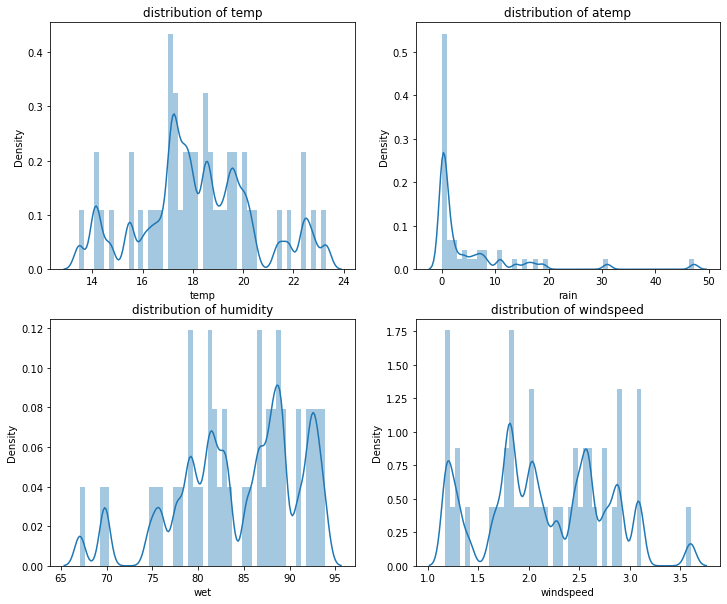

In [ ]:
fig, axes = plt.pyplot.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.distplot(nehu["temp"],ax=axes[0][0])
sns.distplot(nehu["rain"],ax=axes[0][1])
sns.distplot(nehu["wet"],ax=axes[1][0])
sns.distplot(nehu["windspeed"],ax=axes[1][1])

axes[0][0].set(xlabel='temp',title="distribution of temp")
axes[0][1].set(xlabel='rain',title="distribution of atemp")
axes[1][0].set(xlabel='wet',title="distribution of humidity")
axes[1][1].set(xlabel='windspeed',title="distribution of windspeed")

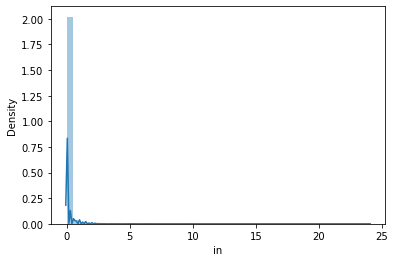

In [ ]:
# 共享單車按例有把出租量取log讓其變常態分佈，到底用意是？？ 還有為何in資料是float阿？這樣取log會錯
sns.distplot(nehu["in"])

import numpy as np
# sns.distplot(np.log(nehu["in"]))

In [ ]:
neihu_1 = nehu[nehu['time_range']==1]

In [ ]:
neihu_1.head()

,La,Lo,date,year,month,day,time_range,weekday,ISHoliday,cityName,townname,temp,wet,windspeed,rain,in,out,stay,need,OI_diff,remain,LAST_IN,LAST_OUT,LAST_STAY,LAST_OI_DIFF,LAST_remain,avg4w_in,avg4w_Out,avg4w_stay,avg4w_OI_diff,avg4w_remain
4,25.055,121.576,2022-02-15,2022,2,15,1,2,0,臺北市,內湖區,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.000000,0.0,0.000000,0.000000
10,25.055,121.576,2022-02-09,2022,2,9,1,3,0,臺北市,內湖區,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.000000,0.0,0.000000,0.000000
16,25.055,121.576,2022-02-03,2022,2,3,1,4,1,臺北市,內湖區,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.000000,0.0,0.000000,0.000000
20,25.055,121.576,2021-12-17,2021,12,17,1,5,0,臺北市,內湖區,18.500000,81.923077,2.876923,4.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.25,-0.25,0.0,0.041667,0.0,0.041667,-0.020833
21,25.055,121.576,2022-01-07,2022,1,7,1,5,0,臺北市,內湖區,16.554545,82.554334,2.267201,5.541667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.025000,0.0,0.025000,0.000000


In [ ]:
neihu_1.shape

(58125, 31)

In [ ]:
lt = ['temp','wet','windspeed','rain','out','stay','LAST_IN', 'LAST_OUT', 'LAST_STAY','avg4w_in','avg4w_Out','avg4w_stay']
nehu_stad = neihu_1[lt]
neihu_1[lt] = (nehu_stad-nehu_stad.mean())/nehu_stad.std()

In [ ]:
nehu_encode = pd.get_dummies(neihu_1, columns=['weekday'])

In [ ]:
nehu_encode = nehu_encode.drop(columns=['La','Lo','date','year','month','day','cityName','townname','time_range'])

In [ ]:
# df_origin[df_origin.isnull().T.any()]

In [ ]:
nehu_encode.reset_index(drop=True, inplace=True)

# 訓練模型

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
# 第1版參數跑出來超怪，我明明是參照corr把接近0的拿掉，接近+-1的納入阿...
# features = ['temp','wet','windspeed','rain','out','stay','LAST_IN', 'LAST_OUT', 'LAST_STAY','avg4w_in','avg4w_Out','avg4w_stay'
#           ,'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5','weekday_6', 'weekday_7'
#           ,'need','OI_diff','remain','LAST_OI_DIFF','LAST_remain','avg4w_OI_diff','avg4w_remain','ISHoliday']
features = ['temp','wet','windspeed','rain','out','stay','LAST_IN', 'LAST_OUT', 'LAST_STAY','avg4w_in','avg4w_Out','avg4w_stay'
            ,'weekday_1','weekday_2', 'weekday_3', 'weekday_4', 'weekday_5','weekday_6', 'weekday_7']

In [ ]:
# 抓幾筆當驗證資料集
lst1 = list(nehu_encode[features].iloc[5])
lst2 = list(nehu_encode[features].iloc[50])
lst3 = list(nehu_encode[features].iloc[500])
lst4 = list(nehu_encode[features].iloc[5000])
lst5 = list(nehu_encode[features].iloc[10000])
a1 = nehu_encode['in'].iloc[5]
a2 = nehu_encode['in'].iloc[50]
a3 = nehu_encode['in'].iloc[500]
a4 = nehu_encode['in'].iloc[5000]
a5 = nehu_encode['in'].iloc[10000]
nehu_encode = nehu_encode.drop([5,50,500,5000,10000])

In [ ]:
train_data,test_data = train_test_split(nehu_encode,train_size=0.8,random_state=0)

In [ ]:
train_data = train_data.drop(index=list(train_data[train_data['temp'].isna()==True].index))

In [ ]:
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features],train_data['in'])

print('Intercept: {}'.format(complex_model_1.intercept_))#與y軸的截距值
print('Coefficients: {}'.format(complex_model_1.coef_))#模型的係數

Intercept: 0.03452971747258152
Coefficients: [-0.00118414  0.00152732 -0.00153767 -0.00129506  0.21137749  0.02355757
 -0.01223196  0.00702495 -0.00304813  0.15225779 -0.12715423 -0.00680815
 -0.00292545 -0.00132606  0.00672703  0.00035116  0.00034286 -0.00094102
 -0.00222853]


# 儲存模型

In [ ]:
# 用joblib儲存(到硬碟)
import joblib
joblib.dump(complex_model_1, '/content/gdrive/MyDrive/data/irent_1st_project/Motor_model.pkl')
# 用joblib讀取
loaded_model = joblib.load('/content/gdrive/MyDrive/data/irent_1st_project/Motor_model.pkl')
result = loaded_model.predict(test_data[features])
print(result)

[ 0.00428997  0.16764     0.17523408 ... -0.00136011 -0.0010276
 -0.01224431]


In [ ]:
# 用pickle儲存(沒有存到硬碟)
import pickle
Motor_model_2 = pickle.dumps(complex_model_1)
# 用pickle讀取
loaded_model = pickle.loads(Motor_model_2)
result = loaded_model.predict(test_data[features])
print(result)

[ 0.00428997  0.16764     0.17523408 ... -0.00136011 -0.0010276
 -0.01224431]


In [ ]:
# 用pickle儲存(到硬碟)
import pickle
output = open('/content/gdrive/MyDrive/data/irent_1st_project/Motor_model_3.pkl','wb')
input = open('/content/gdrive/MyDrive/data/irent_1st_project/Motor_model_3.pkl','rb')
s = pickle.dump(complex_model_1,output)
output.close

<function BufferedWriter.close>

In [ ]:
# 用pickle讀取(從硬碟)
s2 = pickle.load(input)
input.close
result = s2.predict(test_data[features])
print(result)

[ 0.00428997  0.16764     0.17523408 ... -0.00136011 -0.0010276
 -0.01224431]


# 模型驗證

In [ ]:
test_data = test_data.drop(index=list(test_data[test_data['temp'].isna()==True].index))
pred = complex_model_1.predict(test_data[features])#拿訓練好的模型預測數據
pred

array([ 0.00428997,  0.16764   ,  0.17523408, ..., -0.00136011,
       -0.0010276 , -0.01224431])

In [ ]:
rtrcm = float(format(complex_model_1.score(train_data[features],train_data['in']),'.3f'))#計算準確度
rtrcm

0.771

In [ ]:
rtecm = float(format(complex_model_1.score(test_data[features],test_data['in']),'.3f'))
rtecm

0.649

In [ ]:
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['in'],pred)),'.3f'))
rmsecm

0.167

In [ ]:
# 刪空值再預測
nehu_encode_cv = nehu_encode.drop(index=list(nehu_encode[nehu_encode['temp'].isna()==True].index))
# cross_val_score交叉驗證參數:模型、輸入、答案、分成5組
cv = float(format(cross_val_score(complex_model_1,nehu_encode_cv[features],nehu_encode_cv['in'],cv=5).mean(),'.3f'))
cv

0.699

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# n_estimators表示多少顆樹
clf_cal = RandomForestRegressor(n_estimators=1000, min_samples_split=11, oob_score=True)
clf_cal

RandomForestRegressor(min_samples_split=11, n_estimators=1000, oob_score=True)

0.7654410017937581

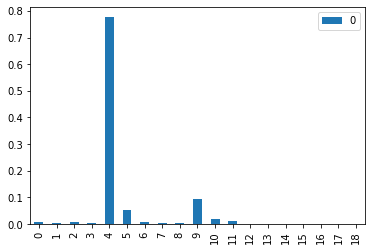

In [ ]:
clf_cal.fit(train_data[features],train_data['in']) # 前者是資料，後者是答案
pd.DataFrame(clf_cal.feature_importances_).plot(kind='bar')
clf_cal.oob_score_
# 隨機森林樣本中有一部分原始樣本資料(~ 40%)不會出現在訓練資料集中，這些資料便稱為 Out-Of-Bag (OOB) 資料。而透過這些資料來評估模型的方式，稱為 OOB 估計，
# 這和Cross Validation一樣，但相較起交叉驗證，OOB估計能透過少量資料的計算量達到近似於交叉驗證的結果，對於交叉驗證的高計算量下，是一個節省資源的採樣及估計方式

In [ ]:
clf_cal.feature_importances_ # 這是看哪個欄位和結果最相關吧？！ 想不到隨機森林內建這好東西

array([6.85727151e-03, 4.98521851e-03, 8.42828122e-03, 5.67161291e-03,
       7.77093258e-01, 5.27232780e-02, 8.91079192e-03, 5.76125244e-03,
       2.65395715e-03, 9.41936813e-02, 1.86556207e-02, 9.86800259e-03,
       3.19289493e-04, 4.51547895e-04, 1.39911009e-03, 2.99443466e-04,
       3.65478075e-04, 3.31268034e-04, 1.03163709e-03])

In [ ]:
# 我加：這應該是指訓練資料本身的準確率吧？
clf_cal.score(train_data[features],train_data['in'])

0.905419609227997

In [ ]:
clf_cal.score(test_data[features],test_data['in'])

0.6800872544354077

In [ ]:
pred = clf_cal.predict(test_data[features])#拿訓練好的模型預測數據
pred

array([0.        , 0.21329928, 0.        , ..., 0.        , 0.        ,
       0.00735592])

In [ ]:
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['in'],pred)),'.3f'))
rmsecm

0.16

In [ ]:
# cross_val_score交叉驗證參數:模型、輸入、答案、分成5組
cv = float(format(cross_val_score(clf_cal,nehu_encode_cv[features],nehu_encode_cv['in'],cv=5).mean(),'.3f'))
cv

0.746

In [ ]:
# del lst1[0] # 等同lst1.pop(0)
# lst1.remove(1.0)#刪除特定值

In [ ]:
test_data[features]

,temp,wet,windspeed,rain,out,stay,LAST_IN,LAST_OUT,LAST_STAY,avg4w_in,avg4w_Out,avg4w_stay,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
32435,0.857952,1.231532,-1.515300,-0.535097,-0.132410,-0.191072,-0.129792,-0.133213,-0.192303,-0.252319,-0.255944,-0.388666,0,0,0,1,0,0,0
16189,0.314292,0.172666,-0.195844,-0.535097,0.819754,0.092325,-0.129792,-0.133213,9.859267,0.190354,0.175235,2.687922,0,0,0,0,0,0,1
41396,-0.611976,-0.771916,0.454414,-0.527507,0.819754,-0.191072,-0.129792,-0.133213,-0.192303,-0.252319,-0.061913,-0.388666,0,0,0,0,0,1,0
20144,-0.043930,0.963621,0.992013,2.925656,-0.132410,-0.191072,-0.129792,-0.133213,-0.192303,0.494692,-0.013406,0.149737,0,0,0,0,1,0,0
27859,-0.241554,0.346268,1.210626,1.221300,-0.132410,-0.191072,-0.129792,-0.133213,-0.192303,-0.086317,-0.255944,-0.183561,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15893,0.944188,-2.172764,0.807280,-0.559541,-0.132410,-0.191072,-0.129792,-0.133213,-0.192303,-0.086317,-0.255944,-0.388666,0,0,1,0,0,0,0
42186,1.375367,-0.215942,0.718002,-0.527507,-0.132410,-0.191072,-0.129792,-0.133213,-0.192303,-0.252319,-0.255944,-0.164915,0,1,0,0,0,0,0
17503,-0.611976,-0.771916,0.454414,-0.527507,-0.132410,-0.191072,-0.129792,-0.133213,-0.192303,-0.252319,-0.255944,-0.388666,0,0,0,0,0,1,0
55680,-1.784816,-0.608562,0.708958,-0.118766,-0.132410,-0.191072,-0.129792,-0.133213,-0.192303,-0.252319,-0.255944,-0.388666,0,1,0,0,0,0,0


In [ ]:
df_valid = pd.DataFrame([lst1,lst2,lst3,lst4])
lst_valid = [a1,a2,a3,a4]

In [ ]:
pred_1_L = complex_model_1.predict(df_valid)#拿訓練好的模型預測數據
print(pred_1_L)
pred_1_R = clf_cal.predict(df_valid)#拿訓練好的模型預測數據
print(pred_1_R)
print(lst_valid)

[ 0.03409568  0.01112454 -0.00076255 -0.00310043]
[0.25372453 0.         0.         0.        ]
[0.25, 0.0, 0.0, 0.0]
